In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import xarray as xr
import pandas as pd
import statsmodels.api as sm

In [8]:
from admix.data import quantile_normalize

In [2]:
# extract phenotype from another file (because in another UKB application)
col_dict = {
    "21003-0.0": "AGE",
    "31-0.0": "SEX",
    "21000-0.0": "SIRE",
    "eid": "ID",
    "30897-0.0": "dilution_factor",
    "30690-0.0": "cholesterol",
    "30780-0.0": "ldl_direct",
    "30760-0.0": "hdl_cholesterol",
    "30000-0.0": "white_blood_count",
    "30130-0.0": "monocyte_count",
    "30140-0.0": "neutrophill_count",
}

path_pheno = "/u/project/sriram/ukbiobank/33127/ukb39967.enc_ukb.converted2.csv"

trait_pheno = pd.read_csv(path_pheno, usecols=col_dict.keys()).rename(columns=col_dict)
trait_pheno.ID = trait_pheno.ID.astype(str)
trait_pheno = trait_pheno.set_index("ID")

In [4]:
DATA_DIR = "/u/project/pasaniuc/kangchen/tractor-response/ukb"

In [10]:
from IPython.display import display, HTML, Markdown
# make sure two phenotype file matches
meta_info = pd.read_csv(join(DATA_DIR, "00_data/meta_info.csv"), index_col=0)
meta_info.index = meta_info.index.astype(str)
df_pheno = meta_info.join(trait_pheno, rsuffix='_trait')

for col in ["SEX", "AGE"]:
    display(Markdown(f"## {col}"))
    display(merged[df_pheno[f"{col}_trait"] != df_pheno[col]])
display(Markdown(f"## SIRE"))
display(df_pheno[df_pheno["SIRE_trait"] != df_pheno["SIRE_ID"]])
# these mismatch individuals correspond to missing phenotype
# will cope with these in association
df_pheno.to_csv("out/data/trait_pheno.csv")

## SEX

,AGE,SEX,SIRE_ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,SEX_trait,SIRE_trait,AGE_trait,white_blood_count,monocyte_count,neutrophill_count,cholesterol,hdl_cholesterol,ldl_direct,dilution_factor
5841951,55,0,4001.0,344.109,64.2523,-8.57264,5.05607,1.01965,0.665122,-3.47168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## AGE

,AGE,SEX,SIRE_ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,SEX_trait,SIRE_trait,AGE_trait,white_blood_count,monocyte_count,neutrophill_count,cholesterol,hdl_cholesterol,ldl_direct,dilution_factor
5841951,55,0,4001.0,344.109,64.2523,-8.57264,5.05607,1.01965,0.665122,-3.47168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## SIRE

,AGE,SEX,SIRE_ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,SEX_trait,SIRE_trait,AGE_trait,white_blood_count,monocyte_count,neutrophill_count,cholesterol,hdl_cholesterol,ldl_direct,dilution_factor
1168072,48,1,NaN,332.5570,64.79240,-5.603890,1.104930,-1.771140,-1.708100,-4.806400,...,1.0,NaN,48.0,6.60,0.32,4.32,5.431,1.098,3.420,0.993463
1529443,65,1,NaN,145.5840,32.05490,1.633380,-15.596400,3.017780,0.144049,6.721240,...,1.0,NaN,65.0,5.74,0.59,2.73,5.186,1.045,3.370,1.002980
1595335,47,0,NaN,324.2560,61.50340,-6.104580,4.247780,-2.547880,3.330120,-5.312460,...,0.0,NaN,47.0,3.47,0.15,2.57,2.808,1.431,1.325,1.004270
1804222,48,0,NaN,234.4210,43.83270,-6.893090,0.334550,-1.262950,6.192830,0.671335,...,0.0,NaN,48.0,3.51,0.19,1.91,5.481,1.370,3.520,1.001170
2143156,59,1,NaN,48.3585,9.29026,1.305160,-1.466670,-3.472300,-2.973370,2.413120,...,1.0,NaN,59.0,9.12,0.61,5.54,6.587,1.424,4.233,1.000740
2953252,68,0,NaN,366.8170,73.20770,-4.702320,6.865320,-2.381090,1.147820,-1.191260,...,0.0,NaN,68.0,5.82,0.49,3.69,4.763,1.531,3.021,1.005700
3169934,52,1,NaN,12.2970,2.64207,6.490200,-30.050100,6.336000,-2.255890,17.567900,...,1.0,NaN,52.0,7.36,0.39,3.75,5.522,1.066,3.598,1.008170
3361126,63,1,NaN,342.3860,67.32070,-5.742190,6.297100,0.612043,-0.676849,-1.532790,...,1.0,NaN,63.0,5.82,0.42,2.68,3.386,NaN,1.803,0.987492
3749755,62,0,NaN,216.1980,34.86370,11.478800,-31.403000,2.753530,-0.307258,10.939800,...,0.0,NaN,62.0,7.01,0.19,4.97,4.612,1.084,2.877,0.999714
4045563,66,1,NaN,295.4590,56.53600,-0.801322,0.178833,0.362361,-3.089330,0.633111,...,1.0,NaN,66.0,6.40,0.30,3.90,6.948,1.006,4.305,0.997054


In [23]:
# extract phenotype
for col_trait in ["cholesterol", "ldl_direct", "hdl_cholesterol", "white_blood_count", "monocyte_count", "neutrophill_count"]:
    plink_pheno = df_pheno[[col_trait]].copy()
    # quantile normalization
    plink_pheno[col_trait] = quantile_normalize(plink_pheno[[col_trait]])
    plink_pheno["FID"] = plink_pheno["IID"] = plink_pheno.index
    plink_pheno["IID"] = plink_pheno["FID"] + "_" + plink_pheno["IID"]    
    plink_pheno["FID"] = "0"
    
    plink_pheno[["FID", "IID", col_trait]].to_csv(join(f"out/data/{col_trait}.pheno"), index=False, sep='\t', na_rep='NA', float_format="%.8f")

    
# extract covariance
col_covar = ["AGE", "SEX", "dilution_factor"]
plink_covar = df_pheno[col_covar].copy()
plink_covar["FID"] = plink_covar["IID"] = plink_covar.index
df_pc = pd.read_csv(join(DATA_DIR, "01_plink/pca.eigenvec"), delim_whitespace=True, header=None, names=["FID", "IID"] + [f"PC{i + 1}" for i in range(20)])
df_pc = df_pc.astype({"FID": str, "IID": str})
plink_covar = pd.merge(plink_covar, df_pc, on=["FID", "IID"])
# impute missing covariates with median
plink_covar = plink_covar.fillna(plink_covar.median())
plink_covar["IID"] = plink_covar["FID"] + "_" + plink_covar["IID"]    
plink_covar["FID"] = "0"
plink_covar[["FID", "IID", *(col_covar + [f"PC{i + 1}" for i in range(10)])]].to_csv("out/data/covar.txt", index=False, sep='\t', na_rep='NA', float_format="%.8f")


In [25]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import admix
import matplotlib.pyplot as plt
import dask
import dask.array as da
from tqdm import tqdm
import statsmodels.api as sm
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
from admix.data import quantile_normalize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
trait = "white_blood_count"

In [28]:
assoc = pd.read_csv(f"out/plink_assoc/assoc.{trait}.1.glm.linear", delim_whitespace=True)

IndexError: index 49100 is out of bounds for axis 0 with size 41271

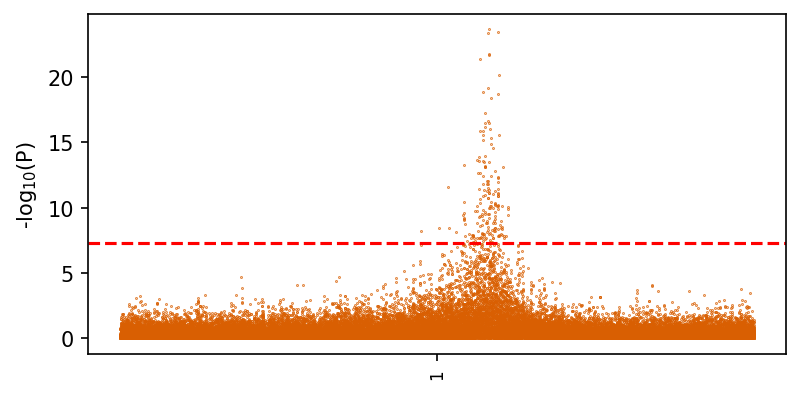

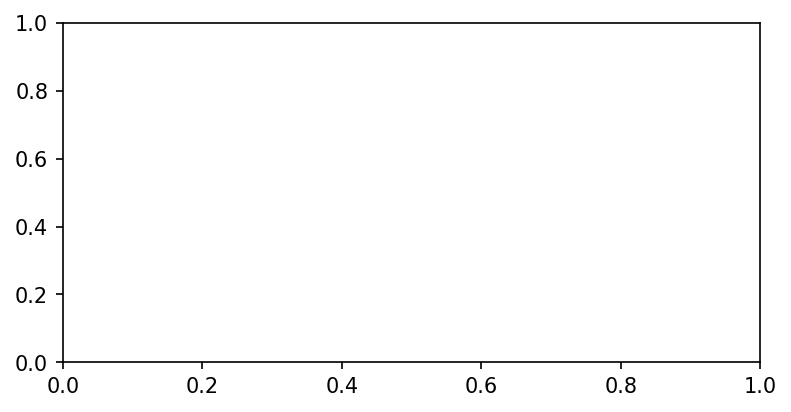

In [32]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
admix.plot.manhattan(pval=assoc["P"].values, chrom=assoc["#CHROM"].values, ax=ax)
fig.show()

fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
# DARC
region_index = np.arange(4.91e4, 4.96e4, dtype=int)

admix.plot.manhattan(chrom=assoc["#CHROM"].values[region_index], pval=assoc["P"].values[region_index], ax=ax)
fig.show()